In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using StatsBase, Distributions, Plots, LinearAlgebra, Plots

In [6]:
using Revise

includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_gibs.jl")
includet("../src/ESGModels/msvar_simulate.jl") 

In [357]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]
X = [.12, .06]


n_steps = 1000
test_regimes = simulate_regimes(states_zero, transition_matrix, n_steps, 1)
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, n_steps, 1)[:,:,1]'

1000×2 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0422778  0.0513369
 0.159627   0.0180018
 0.186478   0.0414756
 0.167121   0.0598992
 0.0352403  0.069183
 0.129005   0.0459046
 0.138868   0.0872325
 0.0685     0.116396
 0.159416   0.0688908
 0.252828   0.12842
 ⋮          
 0.202235   0.0989284
 0.126945   0.162172
 0.134087   0.17813
 0.0257944  0.0748653
 0.112628   0.0586609
 0.131908   0.0709402
 0.165221   0.0630256
 0.186174   0.0592577
 0.0536112  0.0709588

In [359]:
Y = collect(test_returns[2:end,:])
T = n_steps
p = 1
X = hcat(ones(T-1), test_returns[p:end-1,:])
k= 2 #n_regimes
n_variables = 2
Β = [Β1, Β2]
Σ = [Σ1, Σ2]

2-element Vector{Matrix{Float64}}:
 [0.0064 0.0007199999999999999; 0.0007199999999999999 0.0009]
 [0.0324 0.002205; 0.002205 0.0012250000000000002]

In [360]:
n_samples = 5000
T = 999

result = zeros(Int64, n_samples, T)

for n in 1:n_samples
    result[n, :] = simulate_regimes(Y, X, Β, Σ, transition_matrix, states_zero)
end

result

5000×999 Matrix{Int64}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  2  1  2  2  1  1  1  1  1  2     1  1  1  1  2  2  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  2     2  2  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  2  1  1  2  1  1  1  1  1  1  …  1  1  1  2  2  1  1  1  1  1  1  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  1  1  1  1  1  1  1  1  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 ⋮              ⋮              ⋮        ⋱           ⋮              ⋮        
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  2  2  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1   

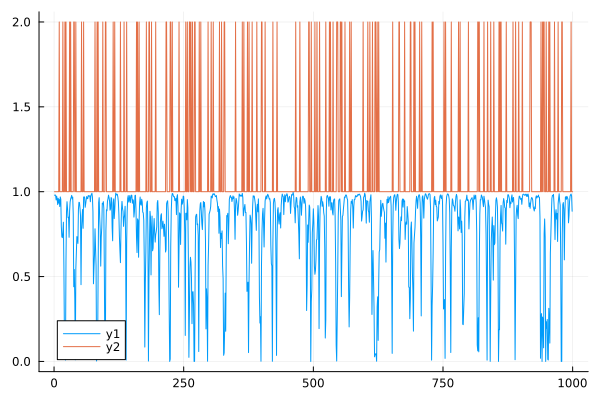

In [361]:
r1 = [count(x -> x ==1, result[:,t]) for t in 1:T ] / n_samples

plot(r1)
plot!(test_regimes)


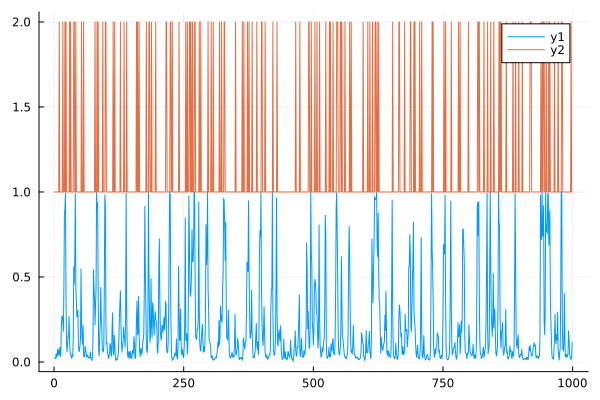

In [362]:
r2 = [count(x -> x ==2, result[:,t]) for t in 1:T ] / n_samples

plot(r2)
plot!(test_regimes)

In [366]:
n = count_regime_transitions(result[1, :], 2)


2×2 Matrix{Float64}:
 729.0   79.0
  79.0  111.0

In [367]:
n ./ sum(n, dims=2) 

2×2 Matrix{Float64}:
 0.902228  0.0977723
 0.415789  0.584211

In [379]:
t_m = zeros(n_samples, 2, 2)
for n in 1:n_samples
  t_m[n, :, :] = sample_transition_matrix(result[n, :], 2)
end

mean_tm = mean(t_m, dims=1)[1,:,:]

mean_tm

2×2 Matrix{Float64}:
 0.902821  0.097179
 0.36346   0.63654

In [369]:
filter_X(Y, result[1,:], 1)

809×2 Matrix{Float64}:
 0.159627   0.0180018
 0.186478   0.0414756
 0.167121   0.0598992
 0.0352403  0.069183
 0.129005   0.0459046
 0.138868   0.0872325
 0.0685     0.116396
 0.159416   0.0688908
 0.252828   0.12842
 0.237225   0.14041
 ⋮          
 0.202235   0.0989284
 0.126945   0.162172
 0.134087   0.17813
 0.0257944  0.0748653
 0.112628   0.0586609
 0.131908   0.0709402
 0.165221   0.0630256
 0.186174   0.0592577
 0.0536112  0.0709588

In [380]:
k = 2
cov_sample =zeros(n_samples, k, 2, 2)

for n in 1:n_samples
    cov_sample[n, :, :, :] = sample_covariance(Y, X, Β, result[n,:], 2)
end

cov1_mean = mean(cov_sample[:,1,:,:], dims=1)[1, :, :]
cov2_mean = mean(cov_sample[:,2,:,:], dims=1)[1, :, :] 


2×2 Matrix{Float64}:
 0.000140797  9.90087e-6
 9.90087e-6   5.62395e-6

In [381]:
display(cov2cor(cov1_mean))
display(sqrt.(diag(cov1_mean)))
display(cov2cor(cov2_mean))
display(sqrt.(diag(cov2_mean)))

2×2 Matrix{Float64}:
 1.0       0.284735
 0.284735  1.0

2-element Vector{Float64}:
 0.002742364490113274
 0.0010543521194710654

2×2 Matrix{Float64}:
 1.0       0.351849
 0.351849  1.0

2-element Vector{Float64}:
 0.011865790473362411
 0.002371486273544729

In [428]:
n_samples = 5000

Β_sample = zeros(n_samples, 2, 3, 2)

for n in 1:n_samples
    Βn = sample_betas(Y,X,result[1,:], cov_sample[1,:,:,:],2)
    Β_sample[n,:,:,:] =  Βn
end

display(mean(Β_sample[:,1,:,:], dims=1))
display(mean(Β_sample[:,2,:,:], dims=1))


1×3×2 Array{Float64, 3}:
[:, :, 1] =
 0.0880634  0.277344  0.234094

[:, :, 2] =
 0.0285969  0.0922603  0.616393

1×3×2 Array{Float64, 3}:
[:, :, 1] =
 0.00482976  0.263498  0.319491

[:, :, 2] =
 0.0435522  0.145921  0.56641